In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
maxDate = session.query(Measurement,func.max(Measurement.date)).all()


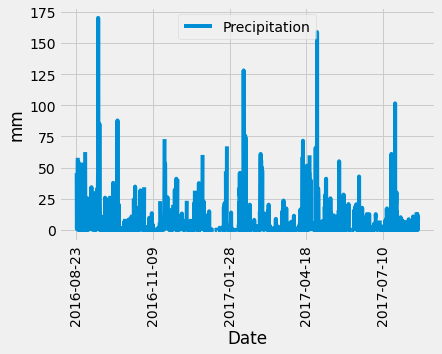

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
maxDate_format = dt.date(2017, 8 ,23)
# Calculate the date one year from the last date in data set.
last_year = maxDate_format - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precidata = [Measurement.date, Measurement.prcp]

# Save the query results as a Pandas DataFrame and set the index to the date column
preci_data = session.query(*precidata).\
    filter(Measurement.date <= maxDate_format).\
    filter(Measurement.date >= last_year).all()
#preci_data
preci_df = pd.DataFrame(preci_data, columns=['Date', 'Precipitation'])
# Sort the dataframe by date
preci_sorted = preci_df.sort_values(by='Date')
preci_sorted
# Use Pandas Plotting with Matplotlib to plot the data

preci_sorted.plot(x='Date', y='Precipitation')
plt.xlabel("Date")
plt.ylabel("mm")
plt.xticks(rotation=90)
plt.show()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
preci_sorted.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station).group_by(Station.station).count()
stations

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp= session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(low_temp, high_temp, avg_temp)

[(12.2,)] [(29.4,)] [(22.03582251082252,)]


<class 'list'>


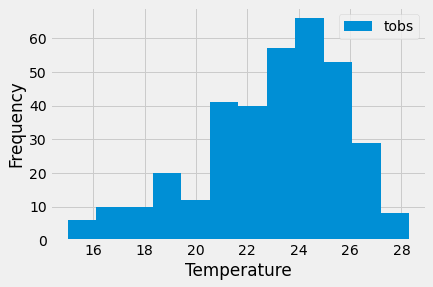

,tobs,station
date,,
2016-08-23,25.0,USC00519281
2016-08-24,25.0,USC00519281
2016-08-25,26.7,USC00519281
2016-08-26,26.7,USC00519281
2016-08-27,23.9,USC00519281
...,...,...
2017-08-14,25.0,USC00519281
2017-08-15,25.0,USC00519281
2017-08-16,24.4,USC00519281


In [23]:
from flask import Flask, jsonify
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
obsdata = [Measurement.date, Measurement.tobs, Measurement.station]


obs_data = session.query(*obsdata).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.date <= maxDate_format).\
    filter(Measurement.date >= last_year).all()

print(type(obs_data))

# Save the query results as a Pandas DataFrame and set the index to the date column

tobs_df = pd.DataFrame(obs_data,  columns=['date','tobs','station'])
tobs_df = tobs_df.set_index(['date'])
tobs = tobs_df['tobs']


plt.hist(tobs, bins=12, label='tobs')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

tobs_df

# Close session

In [ ]:
# Close Session
session.close()